# Проект исследования рынка компьютерных игр:

<b>  Цель исследования: </b> 
 Выявить закономерности определяющие успешность игры для планирования рекламной компании на 2017 год.
 
<b>  Ход исследования:  </b> 
 Исследование будет проводиться в 3 этапа. Будет обработан следующий файл: '/datasets/games.csv'. 
 
 <b> Этап 1. Предобработка данных. </b> 
 Так как о данных нам предварительно мало известно, для их дальнейшего корректного анализа будет проведена предобработка, а именно:
 
 - обработка столбцов и приведение их к единому стандарту
 - выявление и замена пропусков при необходимости
 - приведение данных к необходимому типу
 - добавление дополнительного столбца с данными по продажам для дальнейшего более полного анализа
 
<b> Этап 2. Исследовательский анализ. </b> 
Для того что бы в последующем сделать корректные выводы нам необходимо тщательно изучить имеющиеся данные. Установить, есть ли какие-либо взаимосвязи между ними, определить периоды за которые данные действительно важны, а которые можно не брать в расчет. Для этого будут выполнены следующие пункты:
  
  
 - проанализириуем выпуск игр по годам
 - изучим продажи игр по виду платформы и установим срок их "жизни"
 - определим лидеров по продажам и по виду платформ
 - определим корреляцию между отзывами на игры и продажами внутри одной платформы
 - определим можно ли применить выводы по корреляции одной платформы ко всем остальным
 - изучим распределение игр по жанрам, определим есть ли лидирующие по продажам жанры
 - составим портрет пользователя отдельно для каждого региона с описанием самых популярных патформ и жанров, а также определим влияние рейтинга ESRB на продажи
 
<b> Этап 3. Проверка гипотез. </b> 
На данном этапе проверим гипотезы и сможем сделать окончательные выводы по исследованию.

<b> Этап 4. Общие выводы и рекомендации. </b>

In [1]:
# импортируем необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

#создаем переменную data куда записываем датафрейм
try:
    data = pd.read_csv('/datasets/games.csv')  
except:
    data = pd.read_csv('C:/Users/victo/Downloads/games.csv')  

#выводим общую информацию о датафрейме и первые строки на экран
data.info() 
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Загруженный файл предоставил нам таблицу из 11 столбцов и 16715 строк, в них содержатся следующие данные:

- наименование игры (Name)
- наименование платформы (Platform)
- год выпуска игры (Year_of_Release)
- жанр игры (Genre)
- продажи в северной Америке (NA_sales)
- продажи в Европе (EU_sales)
- продажи в Японии (JP_sales)
- продажи в других регионах (Other_sales)
- оценки критиков (Critic_Score)
- оценки пользователей (User_Score)
- рейтинг ESRB (Rating)

Столбцы Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating содержат пропуски. 6 столбцов типа float и 5 типа object.
В целом файл содержит достаточно данных для обработки и анализа. Будет проведена небольшая предобработка и добавлен столбец с общей суммой продаж.

## Этап. Предобработка данных.

In [2]:
# приводим наименовая столбцов к общему виду с нижним регистром
data.columns = data.columns.str.lower()

In [3]:
# проверим датафрейм на явные дубликаты
data.duplicated().sum()

0

Что бы пропуски не мешали изменению формата столбцов, обработаем их в первую очередь

In [4]:
# поиск и обработка пропусков
display(data.isna().sum())
# также смотрим сразу процентное соотношение пропусков
data.isna().mean()*100

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

In [5]:
# удаляем пропуски в столбцах name, genre, year_of_release
data = data.dropna(subset=['name', 'genre', 'year_of_release'])

#меняем пропуски в столбцах critic_score и user_score на "-1"
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)

# меняем пропуски в столбце rating на "unknown"
data['rating'] = data['rating'].fillna('unknown')

In [6]:
# проверяем наличие пропусков еще раз
display(data.isna().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Касательно причин появления пропусков, в столбцах с наименованием и жанром, ввиду совершенно малого их количества и значимых характеристик, скорей всего это технический сбой при выгрузке данных.

Пропуски в столбце с годом выпуска могут быть как технической ошибкой, так и человеческим фактором, их могли просто не указать.

Пропуски же в остальных столбцах могут быть и технической ошибкой, и человеческим фактором - пропуском при заполнении, а возможно действительно не имеют под собой никакой информации. Например как с рейтингом, игра может не иметь оценку указанного рейтинга. А в случае с оценками критиков и пользователей, игра может быть малоизвестна и также не иметь оценки тех или иных.

1. Колонки с названием, платформой и жанром игры логично оставим в формате object, так как данные в строчном формате таковыми и должны быть. 
2. В колонке с рейтингом данные имеют буквенное обозначение, поэтому также формат остается без изменений - object. 
3. Колонку с годом выпуска логично привести к формату int, так как года в любом случае цельночисленные значения. 
4. Все колонки с данными по продажам оставляем в типе float, так как продажи указаны в миллионах и имеют дробные значения. 
5. В колонке с оценками критиков все значения цельночисленные, поэтому приводим к int. 
6. Колонка с оценками пользователей имеет дробные значения, переформатируем ее во float (предварительно обработав значения 'tbd' в ней).


In [7]:
# преобразуем данные в необходимый формат

data['year_of_release'] = data['year_of_release'].astype(int)
data['critic_score'] = data['critic_score'].astype(int)


In [8]:
# изучаем уникальные значения в колонке user_score
data['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
# меняем значение 'tbd' на условное значение '-1'
data['user_score'] = data['user_score'].str.replace('tbd', '-1')

In [10]:
# проверяем уникальные значения еще раз
data['user_score'].sort_values().unique()

array(['-1', '0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1',
       '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1',
       '2.2', '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1',
       '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1',
       '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1',
       '5.2', '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1',
       '6.2', '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1',
       '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1',
       '9.2', '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

Изменить формат столбца user_score сразу не удалось. Этому помешала аббревиатура "tbd" находящаяся в столбце. Поэтому я решила сразу выяснить что она значит, и как с ней правильно поступить.

Интернет подсказал что данный термин в компьютерных играх используется довольно часто и расшифровывается как To be determined, что значит - будет определено позже, иными словами на момент формирования данных рейтинг пользователей отсутствовал. Возможно игры свежие и еще не имеют отзывов пользователей, или по ним не нашлось данных и решили использовать данную аббревиатуру.

Что бы нам это при обработке и анализе данных не мешало, заменим ее на условное обозначение "-1", на 0 менять не будем так как это все таки определенный параметр рейтинга, и может повлиять на анализ.

In [11]:
# меняем формат столбца user_score
data['user_score'] = data['user_score'].astype(float)

Ни в одном из столбцов содержащих пропуски нельзя заменить их на усредненное или медианное значение, или же на 0. 

1. Наименование и жанр игры не могут зависеть от каких либо среднестатистических характеристик игры (имеющихся в нашем распоряжении), в данном случае это уникальные значения. Более того, в этих колонках всего по 2 пропуска, удалим их.

2. Колонка с годом выпуска также содержит небольшой процент пропусков - 1,6%. Их удаление будет безболезненно для общего объема данных.

3. Оценки пользователей и критиков на данном этапе и при имеющихся данных также сложно раасчитывать среднестатистически. Можно было бы предположить что рейтинг зависит от количества продаж, но это очень спорное предположение в данной ситуации. Такое усреднение будет попросту некорректно и может иметь критическое значение для итоговых выводов ввиду большого процента пропусков 40% и 50% соответственно. Поэтому в данных столбцах заменим пропуски на условное значение "-1".

4. Столбец с рейтингом тоже имеет большое количество пропусков, однако в данном случае логично предположить что попросту не все игры имеют оценку данного рейтинга. Рейтинг ESRB имеет основное распространение в США и Канаде, но даже там получение оценки данного рейтинга не является обязательным. Пропуски в столбце с рейтингом заменим на "unknown".

In [12]:
# обработка неявных дублей в столбце rating
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'unknown'],
      dtype=object)

In [13]:
# замена аналогичных обозначений рейтинга
data['rating'] = data['rating'].str.replace('K-A', 'E')

In [14]:
#контрольная проверка значений
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'M', 'RP', 'T', 'unknown'], dtype=object)

Изучая рейтинг ESRB, я заметила что в разные периоды времени один и тот же рейтинг имел разные обозначения. Так, первоначально Everyone (E) обозначался как Kids to Adults (K-A). Для более корректного анализа приведем все к единой современной оценке - E.

In [15]:
# создаем столбец с общими продажами по всем регионам
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

## Этап. Исследовательский анализ.

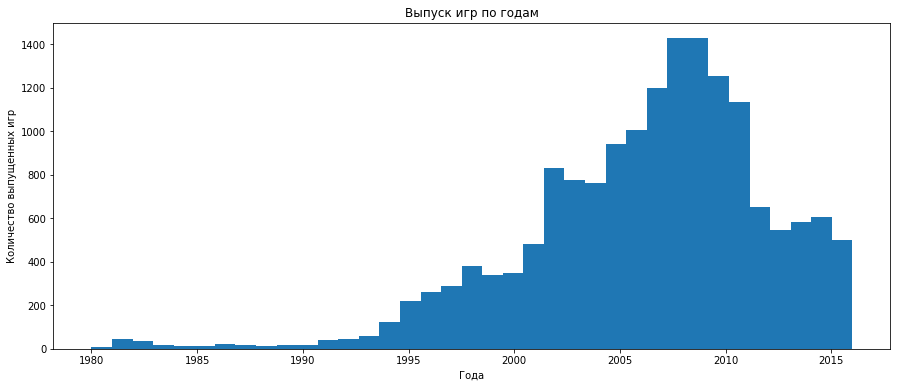

In [16]:
# смотрим сколько выпускалось игр по годам
data['year_of_release'].plot(kind='hist', bins=37, figsize=(15, 6),).\
    set(title='Выпуск игр по годам', xlabel='Года', ylabel='Количество выпущенных игр')
plt.show()


На графике мы видим что пик выпуска игр приходится на 2008 год, тогда было выпущено порядка 1400 игр. После 2011 года количество игр спустилось до уровня 600 игр в год, и до текущего момента остается в этом пределе. Данные до 1995 года наврядли представляют для нас какой-либо интерес, выпускалось мало игр, и платформы давно устарели. 

<function matplotlib.pyplot.show(close=None, block=None)>

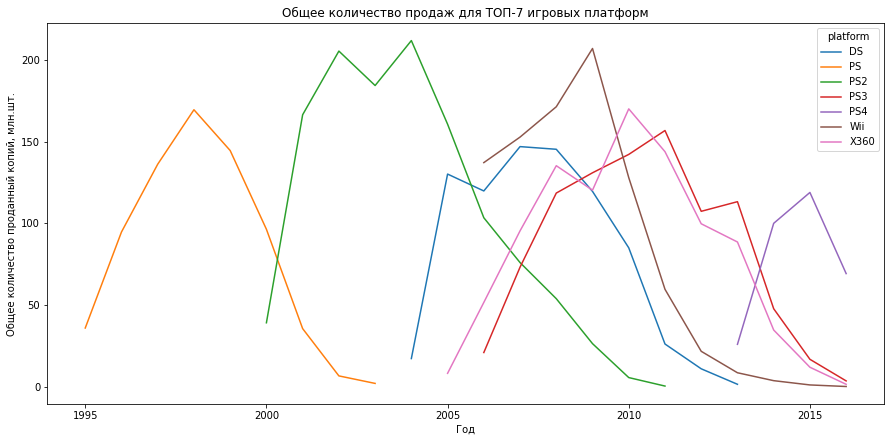

In [17]:
# определяем топ-7 платформ по продажам
top_platforms = data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').\
    sort_values(by='total_sales', ascending=False).reset_index().head(7)['platform']

# строим график продаж по годам и платформам
data.query('platform in @top_platforms and year_of_release > 1994').\
    pivot_table(index=['year_of_release'], columns=['platform'], values='total_sales', aggfunc='sum').reset_index().\
        plot(x='year_of_release', figsize=(15, 7))
plt.title('Общее количество продаж для ТОП-7 игровых платформ')
plt.xlabel('Год')
plt.ylabel('Общее количество проданный копий, млн.шт.')
plt.show


Сгрупировав данные по платформам и отсортировав по общему количеству продаж, мы вывели список ТОП-7 платформ с самым большим количеством продаж. Построив же для них графики продаж по годам можем отметить следующее:

- По графикам очень хорошо видно что продолжительность жизни платформы в среднем составляет 10 лет. 
- Появляются новые платформы с периодичностью 1-4 года, наиболее часто новые платформы появлялись с 2004 по 2006 год, каждый год, а иногда и по нескольку в год. Далее новые платформы появляются уже реже.
- Наиболее активный период жизни для платформы - первые 5 лет. После идет явное снижение продаж игр для платформы.

Исходя из этих выводов будем считать актуальным периодом для дальнейшего анализа - срок в 3 года. Рынок компьютерных игр довольно дианмичный рынок, изменения на нем происходят активно. Платформы и игры которые были популярны более 3 лет назад в текущем и последующем году скорей всего будут терять свою популярность и ввиду устаревания платформы и ввиду устаревания самой версии игры, поэтому не будем ориентироваться на данные старше 3-х лет.

За актуальный период возьмем 2014, 2015, 2016 года.

In [18]:
# запишем датафрейм с актуальным периодом
actual_data = data.query('year_of_release >= 2014')

Одну из потенциально прибыльных платформ можно оценить уже сейчас по предыдущему графику. Это PS4, одна из самых свежих платформ которая в любом случае будет актуальной дольше остальных. Оставшиеся же платформы, несмотря на большие объемы продаж в прошлом, в перспективе уже не дадут таких результатов, их жизненный цикл подходит к концу.

Тем не менее не будем ограничиваться одной платформой, и с помощью "ящика с усами" посмотрим какие преимущества могут иметь другие платформы.

[Text(0.5, 1.0, 'Продажи по платформам за актуальный период 2014-2016гг.'),
 Text(0.5, 0, 'Платформы'),
 Text(0, 0.5, 'Общее количество проданных копий, млн.шт.'),
 (0.0, 2.0)]

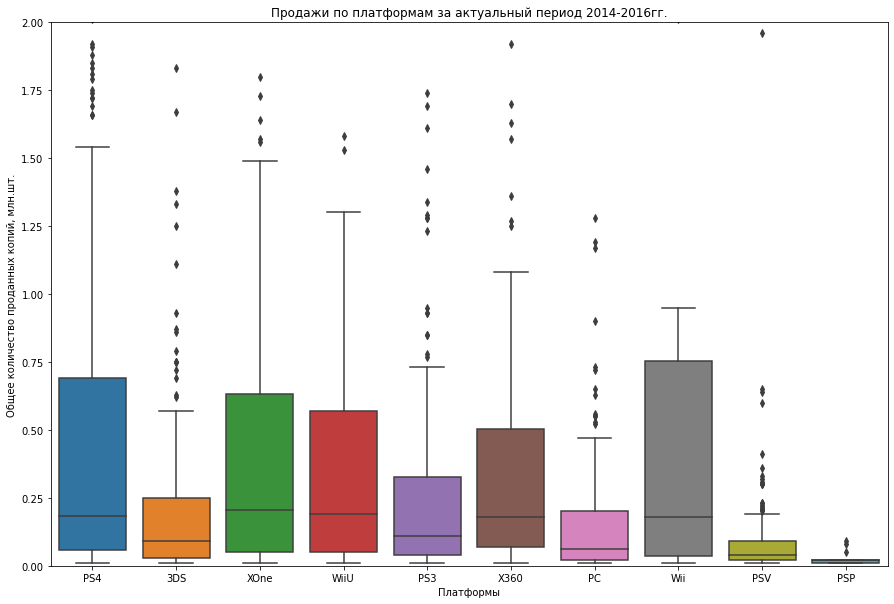

In [19]:
# строим "ящик с усами" для платформ за актуальный период
plt.figure(figsize=(15,10))
sns.boxplot(data=actual_data, x='platform', y='total_sales').\
    set(title='Продажи по платформам за актуальный период 2014-2016гг.', xlabel='Платформы', ylabel='Общее количество проданных копий, млн.шт.', ylim=(0,2))

Вот какие интересные особенности можно подчеркнуть из данного графика: PS4 лидирует по количеству выбросов, в данном случае предполагаю это топовые игры, которые побили все рекорды. Не сильно отстают от PS4 в этом плане Nintendo 3DS и XBox One. Однако стоит учесть, что далеко не всякая игра является топовой, поэтому нельзя ориентироваться только на этот показатель. 

Медианы примерно на одном уровне у PS4, XBox One, XBox360, Wii и WiiU, что означает примерно одинаковый средний уровень покупок по данным платформам. 

3-ий квартиль выше всего у Wii, немного отстает PS4, и далее следуют XBox One и Wii, это показывает нам что в целом спрос для этих платформ будет одинаково высок. Другие платформы отстают по этому показателю.


Мы изучили некоторые характеристики в отношении игровых платформ. Отметим еще несколько наблюдений.

- Среди платформ Sony Playstation однозначным лидером является PS4, как уже отмечала, это самая новая версия платформы, и у нее достаточно хорошие характеристики относительно продаж. Много топовых игр, хороший показатель по объему продаж медианы и квартиля. 
- У Nintendo с небольшим отрывом от WiiU лидирует Wii. Однако если мы изучим Wii и WiiU подробней, можно отметить следующее, WiiU гораздо моложе, выпущена в 11/12 году, тогда как Wii выпущена в 2005/2006 году, то есть её жизненный цикл практически подходит к концу. WiiU гораздо мощнее по техническим характеристикам, но при этом и дороже. В связи с чем как перспективные рассматривала бы обе платформы.
- У XBox вперед по показателям за выбранный период выходит Xbox One, так как и по техническим характеристикам она превосходит свою предшественницу XBox 360, так же рекомендую как перспективные, обе эти платформы.

Таким образом потенциально прибыльными считаю следующие платформы: PS4, Xbox360, XboxOne, Wii и WiiU.

<AxesSubplot:title={'center':'Корреляция отзывов пользователей и общих продаж'}, xlabel='Оценка пользователей', ylabel='Общее кол-во продаж'>

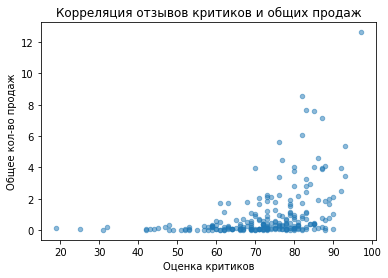

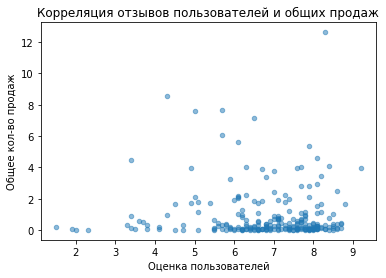

In [20]:
# создадим выборку по платформе PS4 
ps4 = actual_data.query('platform == "PS4" and critic_score > 0 and user_score > 0')

# строим диаграммы рассеивания
ps4.plot(x='critic_score', 
        y='total_sales', 
        kind='scatter', 
        alpha=0.5,
        title='Корреляция отзывов критиков и общих продаж',
        xlabel='Оценка критиков',
        ylabel='Общее кол-во продаж') 
ps4.plot(x='user_score',
        y='total_sales',
        kind='scatter',
        alpha=0.5,
        title='Корреляция отзывов пользователей и общих продаж',
        xlabel='Оценка пользователей',
        ylabel='Общее кол-во продаж') 

In [21]:
critic_corr = ps4['critic_score'].corr(ps4['total_sales'])
print('Коэффициент корреляции продаж и оценок критиков:', critic_corr)
user_corr2 = ps4['user_score'].corr(ps4['total_sales'])
print('Коэффициент корреляции продаж и оценок пользователей:', user_corr2)


Коэффициент корреляции продаж и оценок критиков: 0.40190287811475334
Коэффициент корреляции продаж и оценок пользователей: -0.04318585997193634


Диаграмма рассеивания и коэффициент Пирсона явно показывают нам что взаимосвязь между оценками и объемом продаж - небольшая. При этом интересно отметить, что между продажами и оценками пользователей корреляция отрицательная, что означает что это крайне неоднозначный показатель для ориентации на него.

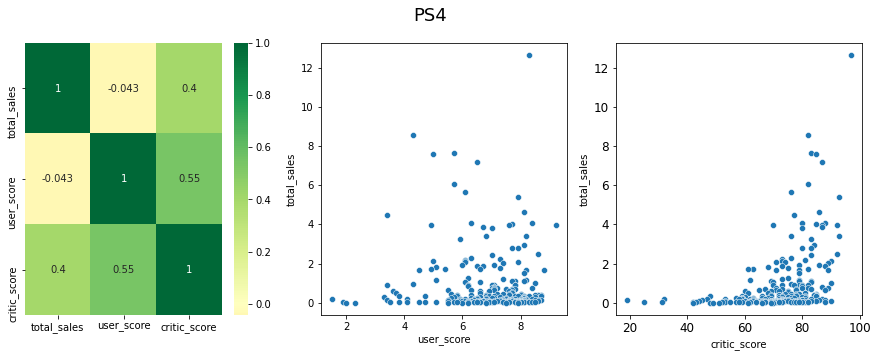

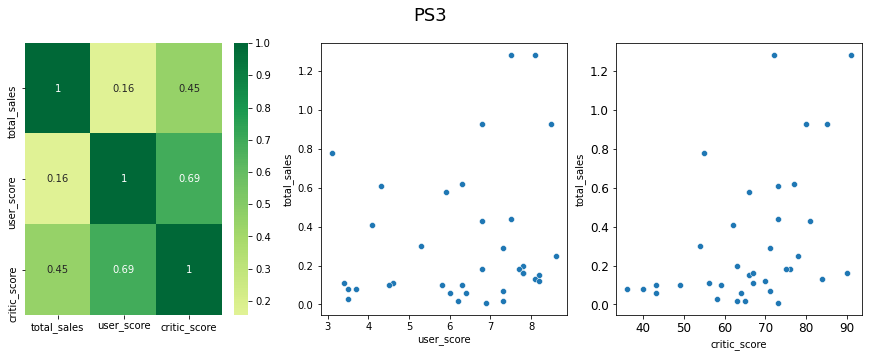

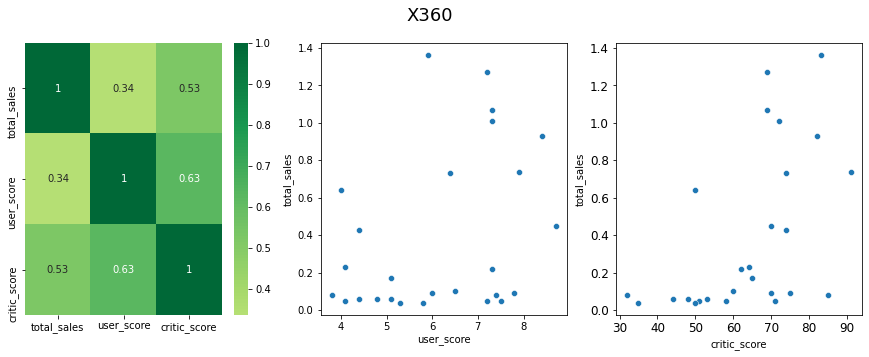

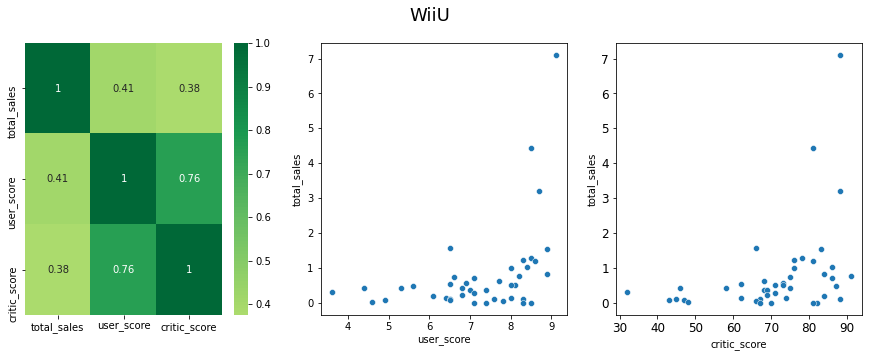

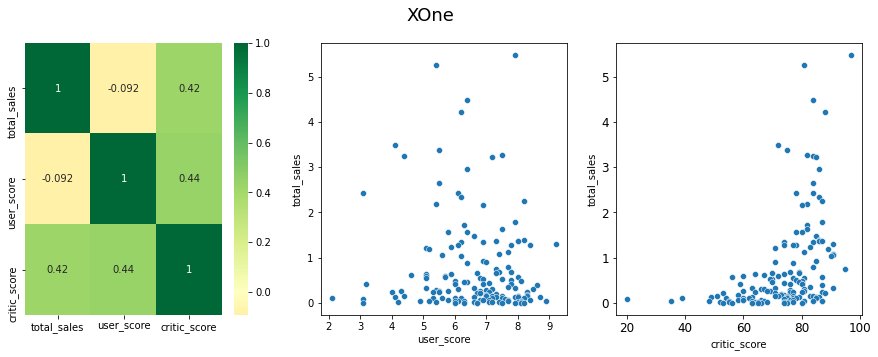

In [22]:
# создадим новую переменную где отсечем условные значения "-1" которые мы добавили вместо пропусков
new_actual = actual_data.query('critic_score > 0 and user_score > 0')

# напишем функцию которая будет рассчитывать нам коэффициент Пирсона и построит диаграмму рассеивания для других платформ
def platform_matrix(df, name_of_platform):
    platform = df.loc[df['platform'] == name_of_platform]
    platform = platform[['total_sales', 'user_score', 'critic_score']]
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    plt.suptitle(name_of_platform, fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    sns.heatmap(ax=ax[0], data=platform.corr(), xticklabels=platform.corr().columns, yticklabels=platform.corr().columns, cmap='RdYlGn', center=0, annot=True)    
    sns.scatterplot(ax=ax[1],x='user_score', y='total_sales', data=platform)    
    sns.scatterplot(ax=ax[2], x='critic_score', y='total_sales', data=platform)

    plt.show()



platforms = ['PS4', 'PS3', 'X360', 'WiiU', 'XOne']
for platform in platforms:
    platform_matrix(new_actual, platform)

Посчитав коэффициенты и построив диаграммы мы лишний раз убедились что взаимосвязь между оценками критиков и пользователей и объемами продаж - слабая.

<function matplotlib.pyplot.show(close=None, block=None)>

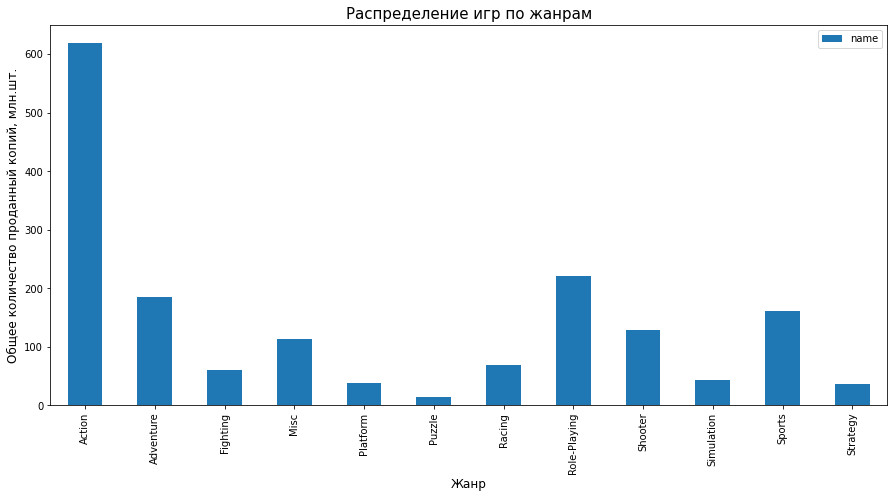

In [23]:
# смотрим распределение игр по жанрам
actual_data.pivot_table(index=['genre'], values='name', aggfunc='count').reset_index().\
    plot(x='genre', kind='bar', figsize=(15, 7))
plt.title('Распределение игр по жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Общее количество проданный копий, млн.шт.', fontsize=12)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

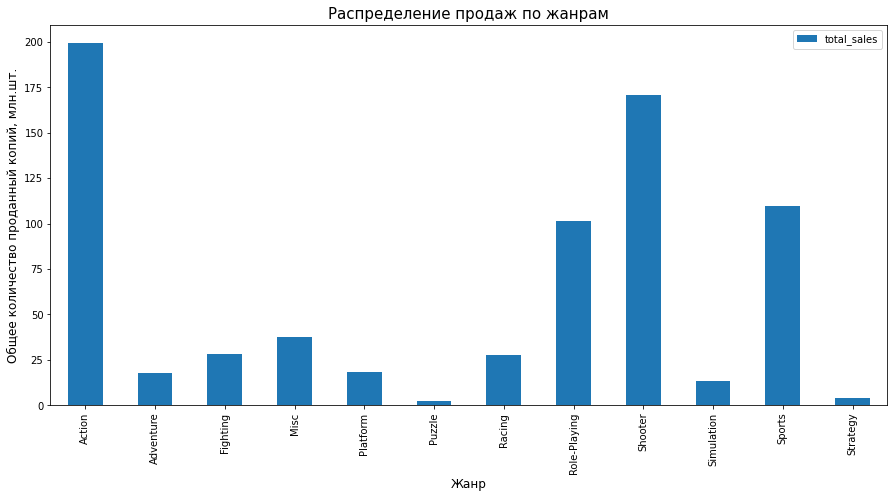

In [24]:
# смотрим распределение продаж по жанрам
actual_data.pivot_table(index=['genre'], values='total_sales', aggfunc='sum').reset_index().\
    plot(x='genre', kind='bar', figsize=(15, 7))
plt.title('Распределение продаж по жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Общее количество проданный копий, млн.шт.', fontsize=12)
plt.show

Определенно больше всего игр выпускается в жанре Action, и по объему продаж он занимает первую позицию. При это интересно отметить что Shooter по объему продаж не сильно уступает жанру Action, при этом количество игр выпускаемых в данном жанре - в 3 раза меньше. Что говорит о большой популярности игр в жанре Shooter самих по себе. На третьем месте игры в жанре Sports, они тоже занимают хорошую часть от продаж.

Самые низкоприбыльные же игры в жанрах Puzzle, Simulation и Strategy. 

Но что бы утвердиться в правильности своих выводов, посмотрим распределение продаж подробней.

[Text(0.5, 1.0, 'Продажи по жанрам за актуальный период 2014-2016гг.'),
 Text(0.5, 0, 'Жанры'),
 Text(0, 0.5, 'Общее количество проданных копий, млн.шт.')]

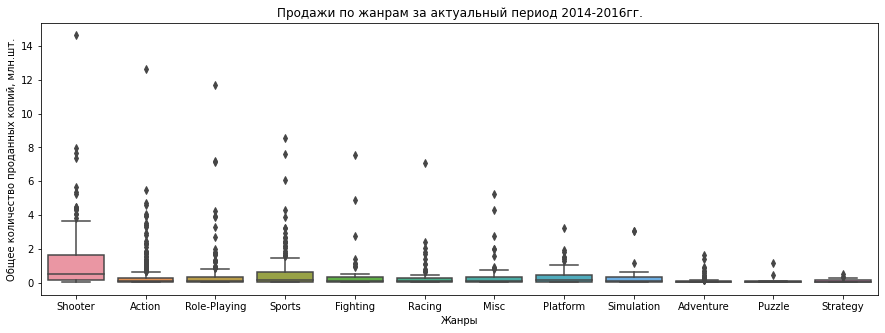

In [25]:
# построим общий график и посмотрим выбросы
plt.figure(figsize=(15,5))
sns.boxplot(data=actual_data, x='genre', y='total_sales').\
    set(title='Продажи по жанрам за актуальный период 2014-2016гг.', xlabel='Жанры', ylabel='Общее количество проданных копий, млн.шт.')

[Text(0.5, 1.0, 'Продажи по жанрам за актуальный период 2014-2016гг.'),
 Text(0.5, 0, 'Жанры'),
 Text(0, 0.5, 'Общее количество проданных копий, млн.шт.'),
 (0.0, 4.0)]

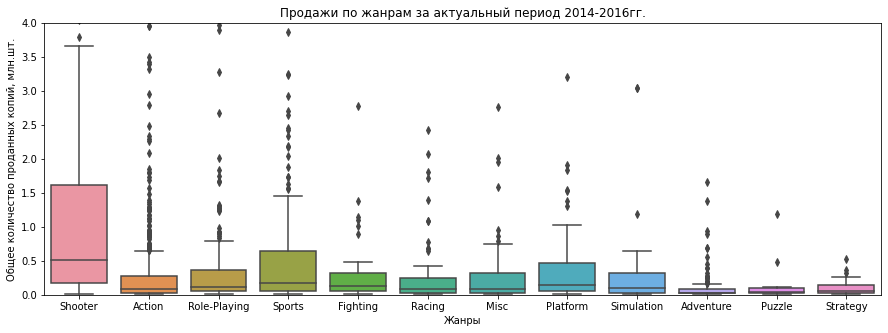

In [26]:
# построим общий график без учета выбросов
plt.figure(figsize=(15,5))
sns.boxplot(data=actual_data, x='genre', y='total_sales').\
    set(title='Продажи по жанрам за актуальный период 2014-2016гг.', xlabel='Жанры', ylabel='Общее количество проданных копий, млн.шт.', ylim=(0,4))

Теперь мы смело можем утвердить лидеров продаж.

1. Shooter. Несмотря на небольшое количество выпускаемых в данном жанре игр, мы видим что спрос на них очень высок даже без учета выбросов, то есть ТОП игр.
2. Sports. На втором месте по уровню спроса и в дополнение имеет тоже достаточное количество выбросов.
3. По среднему уровню продаж как ни странно, на 3-м месте игры в жанре Platform, вероятней всего данный жанр имеет своих постоянных фанатов и плюс в этой категории в целом выпускается небольшое количество игр, что и обуславливает такой интерес к ним.
4. Отдельно стоит отметить жанр Action. Несмотря на самый большой уровень общих продаж, средние же продажи здесь далеко не на первом месте. Связано это с тем, что в этом жанре выпускается больше всего игр, в 3 раза больше чем в других жанрах. И ко всему в этом больше всего выбросов, то есть игр - звезд.

Резюмируя, наиболее прибыльными можно считать игры в жанрах Shooter, Sports. 

In [27]:
# создаем переменную где группируем продажи по необходимым регионам и платформам
top_platform = actual_data.groupby('platform').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})\
    .sort_values(by='na_sales', ascending = False).round().reset_index()
top_platform.loc[5] = ['Другие',
                       top_platform.loc[5]['na_sales'].sum().round(2),
                       top_platform.loc[5]['eu_sales'].sum().round(2),
                       top_platform.loc[5]['jp_sales'].sum().round(2)]
# выводим на экран
top_platform[:6]

,platform,na_sales,eu_sales,jp_sales
0,PS4,99.0,130.0,15.0
1,XOne,81.0,46.0,0.0
2,X360,28.0,15.0,0.0
3,3DS,23.0,16.0,44.0
4,PS3,22.0,26.0,11.0
5,Другие,19.0,13.0,7.0


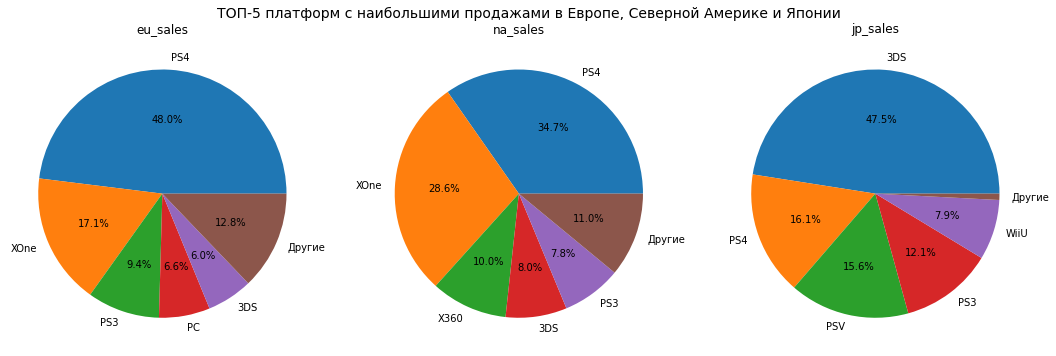

In [28]:
# создаем список с необходимыми регионами и пишем функцию для построения диаграмм
regions_sales = ['eu_sales', 'na_sales', 'jp_sales']
fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
for i, region in enumerate(regions_sales):
    region_platform = actual_data.groupby('platform').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
    region_platform.loc[5] = ['Другие', region_platform.loc[5:][region].sum().round(2)]
    region_top_platform = region_platform.head(6)        
    ax[i].pie(region_top_platform[region], labels=region_top_platform['platform'], autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(region)
plt.suptitle('ТОП-5 платформ с наибольшими продажами в Европе, Северной Америке и Японии', fontsize=14)
plt.tight_layout()
plt.show()

Как наглядно видно на диаграммах, рынки Северной Америки и Европы достаточно схожи, в то время как рынок игр Японии сильно отличается от них.
- В Америке и Европе лидер среди платформа PS4, тогда как в Японии 47,5% рынка приходится на Nintendo3DS, а PS4 на втором месте и занимает 16% рынка.
- На втором месте в Америке и Европе Xbox One, а в Японии данной платформы практически нет.
- Также стоит отметить что в Европе PS4 занимает 48% рынка, тогда как в Америке она хоть и лидирует, но занимает всего 34,7%, ненамного опережая XBox One с 28,6%

In [29]:
# создаем переменную где группируем продажи по необходимым регионам и жанрам
top_genre = actual_data.groupby('genre').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})\
    .sort_values(by='na_sales', ascending = False).round().reset_index()
top_genre.loc[5] = ['Другие',
                       top_genre.loc[5]['na_sales'].sum().round(2),
                       top_genre.loc[5]['eu_sales'].sum().round(2),
                       top_genre.loc[5]['jp_sales'].sum().round(2)]
# выводим на экран
top_genre[:6]

,genre,na_sales,eu_sales,jp_sales
0,Shooter,79.0,66.0,5.0
1,Action,73.0,75.0,30.0
2,Sports,46.0,46.0,3.0
3,Role-Playing,33.0,28.0,31.0
4,Misc,15.0,13.0,6.0
5,Другие,12.0,7.0,6.0


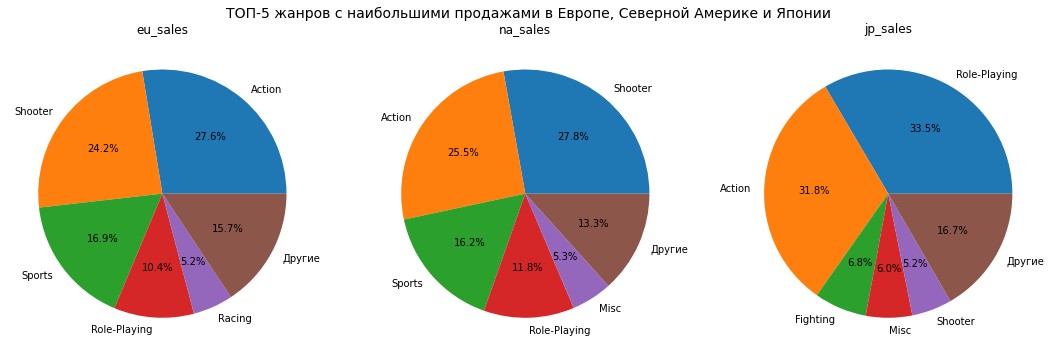

In [30]:
# создаем список с необходимыми регионами и пишем функцию для построения диаграмм
regions_sales = ['eu_sales', 'na_sales', 'jp_sales']
fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
for i, region in enumerate(regions_sales):
    region_genre = actual_data.groupby('genre').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
    region_genre.loc[5] = ['Другие', region_genre.loc[5:][region].sum().round(2)]
    region_top_genre = region_genre.head(6)        
    ax[i].pie(region_top_genre[region], labels=region_top_genre['genre'], autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(region)
plt.suptitle('ТОП-5 жанров с наибольшими продажами в Европе, Северной Америке и Японии', fontsize=14)
plt.tight_layout()
plt.show()

В распределении по жанрам также сохраняется достаточная разница между рынками Японии и Северной Америки и Европы.
- В Японии лидируют ролевые и экшн игры примерно в равных долях - 33,5% и 31,8%. Тогда как в Европе и Америке преимущество за шутерами и экшенами. Правда с небольшой разницей, шутеры занимают в Европе 24,2% а в Америке 27,8%; экшены же в Европе 27,6% а в Америке - 25,5%.
- На третьем месте по популярности в Европе и Америке спортивные игры - 16,9% и 16,2%. В Японии же спортивные игры мало пользуются спросом, и на третьем месте оказались игры имитирующие бои, файтинги. Они занимают 6,8% рынка.
- Ролевые игры, которые в Японии пользуются наибольшим спросом, в Европе и Америке занимают 10,4% и 11,8%.

Как вывод можно отметить следующее. Портрет покупателя очень схож в Северной Америке и Европе, рынки практически идентичны. А вот Япония страна с абсолютно другой культурой и менталитетом, что хорошо отражает потребительский спрос и портрет покупателя.

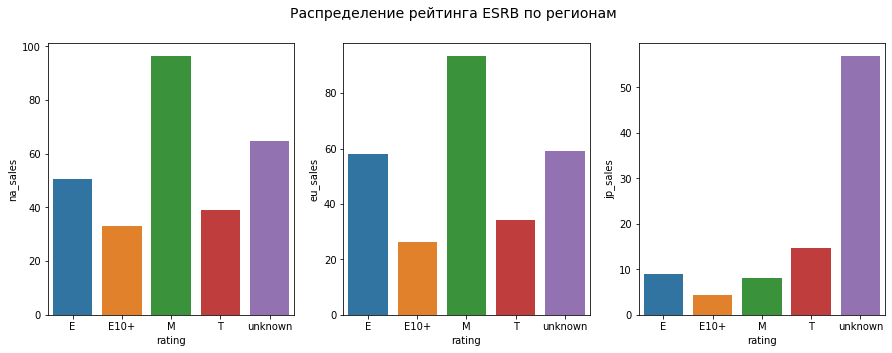

In [31]:
# строим графики распределения рейтинга по регионам
p_rate = actual_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.barplot(x=p_rate.index, y=p_rate['na_sales'], ax=axes[0])
sns.barplot(x=p_rate.index, y=p_rate['eu_sales'], ax=axes[1])
sns.barplot(x=p_rate.index, y=p_rate['jp_sales'], ax=axes[2])
plt.suptitle('Распределение рейтинга ESRB по регионам', fontsize=14)
plt.show()

Как и на предыдущих диаграммах мы видим аналогичную картину с паспределением рейтинга по регионам. Одинаковое распределение в Европе и Америке и совершенно иная картина в Японии. Как уже отмечала выше, рейтинг ESRB преимущественно распространен в США и Канаде. В Японии же его присутствие среди игр невелико. Однако даже в Америке и Европе достаточно большое количество продаваемых игр не имеют рейтинга вовсе. Из чего следует вывод, что рейтинг не имеет влияния на продажи.

## Этап. Проверка гипотез.

Проверим следующие гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- Средние пользовательские рейтинги жанров Action и Sports разные.

In [32]:
# определяем средний пользовательский рейтинг для платформ
xone_rate = actual_data.query('platform == "XOne" and user_score > 0')['user_score']
pc_rate = actual_data.query('platform == "PC" and user_score > 0')['user_score']

print('Средний пользовательский рейтинг Xbox One:', xone_rate.mean())
print('Средний пользовательский рейтинг PC:', pc_rate.mean())


Средний пользовательский рейтинг Xbox One: 6.594545454545456
Средний пользовательский рейтинг PC: 6.298360655737705


H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1 - Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [33]:
#задаем критическое значение
alpha = 0.05

# проверяем нулевую гипотезу
results = st.ttest_ind(xone_rate, pc_rate, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу.


Нулевая гипотеза для проверки рейтинга платформ была сформулирована исходя из первоначального предположения что рейтинг платформ XBox One и PC одинаков. Для проверки был использован критерий - user_score. Отвергнуть нулевую гипотезу не получилось, из чего можно предположить что средний пользовательский рейтинг платформ XBox One и PC одинаковый.

In [34]:
# определяем средний пользовательский рейтинг для жанров
action_rate = actual_data.query('genre == "Action" and user_score > 0')['user_score']
sports_rate = actual_data.query('genre == "Sports" and user_score > 0')['user_score']

print('Средний пользовательский рейтинг Action:', action_rate.mean())
print('Средний пользовательский рейтинг Sports:', sports_rate.mean())


Средний пользовательский рейтинг Action: 6.760606060606061
Средний пользовательский рейтинг Sports: 5.2251968503937


H0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1 - Средние пользовательские рейтинги жанров Action и Sports отличаются.

In [35]:
#задаем критическое значение
alpha = 0.05

# проверяем нулевую гипотезу
results = st.ttest_ind(action_rate, sports_rate, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу.


Нулевая гипотеза для проверки рейтинга жанров была сформулирована исходя из первоначального предположения что рейтинг жанров Action и Sports одинаковые. Для проверки был использован критерий - user_score. У нас получилось отвергнуть нулевую гипотезу, что с большой долей вероятности означает что средний пользовательский рейтинг игр в жанрах Action и Sports отличается.

## Общие выводы и рекомендации.

Был изучен и проанализирован файл с данными о продажах компьютерных игр в мире за период 1980-2016 года. В ходе анализа была произведена обработка данных:
    - обработаны пропуски в данных
    - обработаны дубликаты в рейтинге
    - добавлены общие продажи по всем регионам
    - построены и изучены графики и диаграммы
 
<b> Основные выводы: </b>

1. Резкий скачок в выпуске игр можно наблюдать с 2000 года, пик продаж приходится на 2008 год, тогда в год выпускалось порядка 1400 игр. С 2010 года наблюдается спад в выпуске игр, и на данный момент ежегодно выходит порядка 400-600 игр в год.

2. Средняя продолжительность жизни одной игровой платформы около 10 лет. Новые платформы появляются каждые пару лет. Наиболее актуальна платформа в первые 5 лет своей жизни.

3. На данный момент времени, в лидерах среди платформ в Европе и Америке – PS4 и Xbox One, в Японии – Nintendo 3DS и PS4.
Взаимосвязь между оценками пользователей и критиков и популярностью игр слабая, поэтому параметр оценки можно использовать лишь как дополнительный фактор.
4. Самым популярными жанрами компьютерных игр в Европе и Америке является Action, Shooter и Sports. В Японии – Role-Playing, Action и Fighting.


<b> Рекомендации для маркетинговой кампании на 2017 год: </b>

Поскольку ориентироваться мы будем на европейский рынок компьютерных игр, при составлении маркетинговой кампании рекомендуется сделать основной упор на последние модели платформ: PS4, Xbox One, WiiU. Игры преимущественно в Shooter, Sports. Но не стоит совсем забывать про другие жанры, среди них также встречаются топовые игры.
